<a href="https://colab.research.google.com/github/Yesmine006/Yesmine006/blob/main/PCA_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **What is the MNIST dataset?**

MNIST set is a large collection of handwritten digits. It is a very popular dataset in the field of image processing. It is often used for benchmarking machine learning algorithms.

MNIST is short for Modified National Institute of Standards and Technology database.

MNIST contains a collection of 70,000, 28 x 28 images of handwritten digits from 0 to 9.

The dataset is already divided into training and testing sets.

## **Loading MNIST from Kerars**

In [1]:
from keras.datasets import mnist

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


We can see that there are 60k images in the training set and 10k images in the testing set.

The dimension of our training vector is (60000, 28, 28), this is because there are 60,000 grayscale images with the dimension 28X28.

## **Plotting the MNIST dataset using matplotlib**

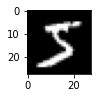

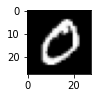

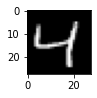

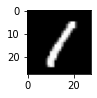

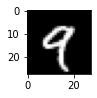

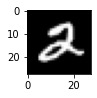

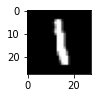

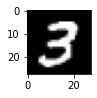

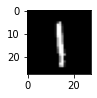

5


In [4]:
from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()
print(train_y[0])

Now we will make a dataset of the number 5

In [5]:
import numpy as np
j=0
s=0
for i in range(60000):
  if train_y[i]==5:
    s=s+1
threeDataset= np.zeros((s, 28,28))
for i in range(60000):
  if train_y[i]==5:
    threeDataset[j]=train_X[i]
    j=j+1

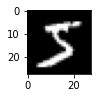

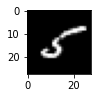

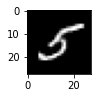

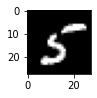

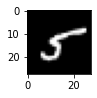

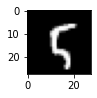

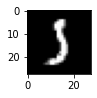

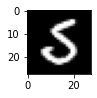

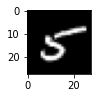

In [6]:
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(threeDataset[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

1. Organize data into an m x n matrix X
• m: number of measurement types (feature vector size)
• n: number of samples

In [7]:
threeDataset.shape

(5421, 28, 28)

In [8]:
# reshape dataset to have a single channel
threeDataset = threeDataset.reshape((threeDataset.shape[0], 784))
#testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [9]:
threeDataset.shape

(5421, 784)

In [10]:
matrix_X=threeDataset.transpose()

In [11]:
matrix_X.shape

(784, 5421)

2. Compute data (sample) mean vector


In [104]:
x_mean= np.zeros(784)
for i in range(5421):
  x_mean+=matrix_X[:,i]
for i in range(784):
  x_mean[i]=x_mean[i]/5421

3. Subtract off mean vector from dataset


In [105]:
matrix_X[:,i].shape

(784,)

In [106]:
x_mean.shape

(784,)

In [107]:
for i in range(5421):
  matrix_X[:,i]=matrix_X[:,i]-x_mean


In [108]:
matrix_X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

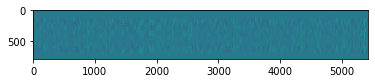

In [109]:
from matplotlib import pyplot as plt
plt.imshow(matrix_X)
plt.show()

4. Calculate sample covariance matrix CX


In [110]:
Cx=np.cov(matrix_X, bias=True)


In [111]:
Cx;

5. Calculate eigenvectors of matrix CX à obtain matrix P


In [112]:
from numpy.linalg import eig
eigenvalues, eigenvectors = eig(Cx)

The normalized (unit “length”) eigenvectors, such that the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i].

In [113]:
eigvec1=eigenvectors[:,0]

In [114]:
eigvec1=eigvec1.reshape(28,28)

In [115]:
eigvec1=eigvec1.real

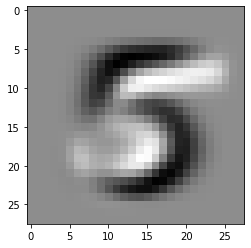

In [116]:
#pyplot.subplot(330 + 1 + i)
pyplot.imshow(eigvec1, cmap=pyplot.get_cmap('gray'))
pyplot.show()

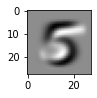

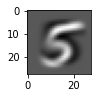

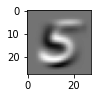

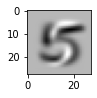

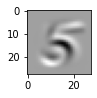

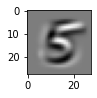

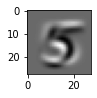

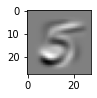

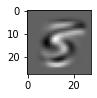

In [117]:
for i in range(9):  
  eigvec1=eigenvectors[:,i]
  eigvec1=eigvec1.reshape(28,28)
  eigvec1=eigvec1.real
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(eigvec1, cmap=pyplot.get_cmap('gray'))
  pyplot.show()

6. Apply change of base
End - Y is the transformed data matrix

In [118]:
matrix_X.shape

(784, 5421)

In [120]:
#P=eigenvectors.transpose()


In [126]:
P=eigenvectors.real

In [127]:
P=P.transpose()

In [143]:
Y=np.matmul( P, matrix_X )
Cy=np.cov(Y)


In [137]:
eigenvalues.min()

(-1.6539999388805961e-12+0j)

In [133]:
Cy[:3,:3]

array([[ 5.17504595e+05, -1.84460292e-10, -2.43999641e-10],
       [-1.84460292e-10,  2.94519755e+05, -4.54653381e-11],
       [-2.43999641e-10, -4.54653381e-11,  2.14277183e+05]])

In [144]:
p=[]
for i in range(784):
  for j in range(784):
    if i!=j:
      p.append(Cy[i,j])

In [147]:
max(p)

1.9858395626551103e-09

In [135]:
Cy

array([[517504.59547299,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        , 294519.75505954,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        , 214277.18266189, ...,
             0.        ,      0.        ,      0.        ],
       ...,
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ]])